# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 airbnb_data](#3.4.1_airbnb_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top neighbourhood_cleansed By Order Of Each Of The Summary Statistics](#3.5.1_Top_neighbourhood_cleansed_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 neighborhood_cleansed_review_scores_rating per region](#3.5.1.1_neighborhood_cleansed_review_scores_rating_per_region)
      * [3.5.1.2 neighborhood_cleansed_review_scores_location per region](#3.5.1.2_neighborhood_cleansed_review_scores_location_per_region)
      * [3.5.1.3 Total neighborhood population per region](#3.5.1.3_Total_neighborhood_population_per_region)
      * [3.5.1.4 neighborhood_cleansed_id_number per region](#3.5.1.4_neighborhood_cleansed_id_number_per_region)
      * [3.5.1.5 neighborhood_cleansed_bedrooms per region](#3.5.1.5_neighborhood_cleansed_bedrooms_per_region)
      * [3.5.1.6 neighborhood_cleansed_number_of_reviews per region](#3.5.1.6_neighborhood_cleansed_number_of_reviews_per_region)
    * [3.5.2 IDs density](#3.5.2_IDs_density)
      * [3.5.2.1 Top regions by IDs density](#3.5.2.1_Top_regions_by_IDs_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average price by region](#3.5.3.3_Average_price_by_region)
      * [3.5.3.4 Adding average price to scatter plot](#3.5.3.4_Adding_average_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Airbnb Region Numeric Data](#3.5.5_Airbnb_Region_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling airbnb price and revenue. The data you started with contained some price values, but with a number of missing values that led to several rows being dropped completely. There were also some obvious issues with some of the other features in the data that, for example, led to one column being completely dropped, a data error corrected, and some other rows dropped. You also obtained some additional Denver population and size data with which to augment the dataset, which also required some cleaning.

The data science problem you subsequently identified is to predict the price for renting airbnb.

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 airbnb_data<a id='3.4.1_airbnb_data'></a>

In [2]:
airbnb_data = pd.read_csv('airbnb_data_cleaned.csv')

In [3]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4889 entries, 0 to 4888
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4889 non-null   int64  
 1   id                           4889 non-null   float64
 2   description                  4889 non-null   object 
 3   host_id                      4889 non-null   int64  
 4   host_name                    4889 non-null   object 
 5   host_since                   4889 non-null   object 
 6   host_location                4148 non-null   object 
 7   host_response_rate           4308 non-null   object 
 8   host_acceptance_rate         4584 non-null   object 
 9   host_neighbourhood           4658 non-null   object 
 10  neighbourhood_cleansed       4889 non-null   object 
 11  latitude                     4889 non-null   float64
 12  longitude                    4889 non-null   float64
 13  property_type     

In [4]:
airbnb_data.head()

,Unnamed: 0,id,description,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_neighbourhood,...,last_scraped,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,home_type
0,0,6.070000e+17,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,430149575,Roye,11/2/2021,NaN,100%,75%,Congress Park,...,12/29/2023,3.00,2.50,2.50,3.00,3.50,4.00,3.00,0.11,Home
1,1,5.460000e+17,Rental unit in Denver · 2 bedrooms · 3 beds · ...,169214047,Jerrod,1/22/2018,"Chicago, IL",NaN,0%,East,...,12/29/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rental
2,3,5.242953e+07,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,107279139,Kyle And Kimberly,12/14/2016,"Denver, CO",100%,100%,South,...,12/29/2023,4.78,4.88,4.62,4.78,4.78,4.93,4.59,2.52,Townhouse
3,4,6.320000e+17,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,416194740,Clayton,7/31/2021,"Colorado, United States",100%,100%,West,...,12/29/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Townhouse
4,5,6.880000e+17,Home in Denver · ★5.0 · 2 bedrooms · 2 beds · ...,133612752,Ryan,6/5/2017,"Denver, CO",NaN,91%,Northwest,...,12/29/2023,5.00,5.00,5.00,5.00,5.00,4.92,4.92,0.99,Home


### 3.4.2 State-wide summary data<a id='3.4.2_State-wide_summary_data'></a>

In [5]:
neighbourhood_summary = pd.read_csv('neighbourhood_summary.csv')

In [6]:
neighbourhood_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    76 non-null     int64  
 1   neighbourhood_cleansed                        76 non-null     object 
 2   neighborhood_cleansed_id_number               76 non-null     int64  
 3   neighborhood_cleansed_review_scores_rating    76 non-null     float64
 4   neighborhood_cleansed_review_scores_location  76 non-null     float64
 5   neighborhood_cleansed_bedrooms                76 non-null     float64
 6   neighborhood_cleansed_number_of_reviews       76 non-null     int64  
 7   neighborhood_cleansed_price                   76 non-null     float64
 8   denver_neighborhoods_population               76 non-null     int64  
 9   region_area_sq_miles                          76 non-null     float

In [7]:
neighbourhood_summary.head()

,Unnamed: 0,neighbourhood_cleansed,neighborhood_cleansed_id_number,neighborhood_cleansed_review_scores_rating,neighborhood_cleansed_review_scores_location,neighborhood_cleansed_bedrooms,neighborhood_cleansed_number_of_reviews,neighborhood_cleansed_price,denver_neighborhoods_population,region_area_sq_miles
0,0,Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53
1,1,Auraria,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32
2,2,Baker,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26
3,3,Barnum,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47
4,4,Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top neighbourhood_cleansed By Order Of Each Of The Summary Statistics<a id='3.5.1_Top_neighbourhood_cleansed_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

What does the state-wide picture for your market look like?

In [8]:
neighbourhood_summary_newind = neighbourhood_summary.set_index('neighbourhood_cleansed')

In [9]:
index_values = neighbourhood_summary_newind.index.to_numpy()
index_values

array(['Athmar Park', 'Auraria', 'Baker', 'Barnum', 'Barnum West',
       'Bear Valley', 'Belcaro', 'Berkeley', 'CBD', 'Capitol Hill',
       'Chaffee Park', 'Cheesman Park', 'Cherry Creek', 'City Park',
       'City Park West', 'Civic Center', 'Clayton', 'Cole',
       'Congress Park', 'Cory - Merrill', 'Country Club', 'DIA',
       'East Colfax', 'Elyria Swansea', 'Five Points', 'Fort Logan',
       'Globeville', 'Goldsmith', 'Hale', 'Hampden', 'Hampden South',
       'Harvey Park', 'Harvey Park South', 'Highland', 'Hilltop',
       'Indian Creek', 'Jefferson Park', 'Lincoln Park', 'Lowry Field',
       'Mar Lee', 'Marston', 'Montbello', 'Montclair',
       'North Capitol Hill', 'North Park Hill', 'Northeast Park Hill',
       'Overland', 'Platt Park', 'Regis', 'Rosedale', 'Ruby Hill',
       'Skyland', 'Sloan Lake', 'South Park Hill', 'Southmoor Park',
       'Speer', 'Stapleton', 'Sun Valley', 'Sunnyside', 'Union Station',
       'University', 'University Hills', 'University Park',

#### 3.5.1.1 neighborhood_cleansed_review_scores_rating per region<a id='3.5.1.1_neighborhood_cleansed_review_scores_rating_per_region'></a>

In [10]:
neighbourhood_summary_newind.neighborhood_cleansed_review_scores_rating.sort_values(ascending=False).head(50)

neighbourhood_cleansed
Auraria                     4.996667
Southmoor Park              4.975000
Lowry Field                 4.955000
Globeville                  4.938889
University Park             4.938571
Indian Creek                4.936667
Belcaro                     4.926000
Montclair                   4.925789
Country Club                4.920909
Chaffee Park                4.918421
Westwood                    4.914783
Skyland                     4.914118
Harvey Park South           4.911429
Sunnyside                   4.910000
Wellshire                   4.906250
Platt Park                  4.902075
Bear Valley                 4.897143
Highland                    4.895846
Harvey Park                 4.894211
Berkeley                    4.893562
University                  4.890244
West Highland               4.889687
Sloan Lake                  4.889245
Northeast Park Hill         4.888974
Washington Park West        4.888438
Civic Center                4.881750
Stapleton      

'Five Points' is 44th neighborhoods for neighborhood_cleansed_review_scores_rating per region

#### 3.5.1.2 neighborhood_cleansed_review_scores_location per region<a id='3.5.1.2_neighborhood_cleansed_review_scores_location_per_region'></a>

In [11]:
neighbourhood_summary_newind.neighborhood_cleansed_review_scores_location.sort_values(ascending=False).head(50)

neighbourhood_cleansed
Auraria                     4.996667
Country Club                4.985455
Washington Park             4.973871
Lowry Field                 4.972000
Belcaro                     4.957000
Platt Park                  4.945094
Highland                    4.941615
Hampden                     4.940000
Sloan Lake                  4.936415
University                  4.933171
Washington Park West        4.930625
University Park             4.930000
West Highland               4.924922
Cory - Merrill              4.914375
Berkeley                    4.913014
Speer                       4.911774
Wellshire                   4.910000
Congress Park               4.904634
Fort Logan                  4.904000
Stapleton                   4.902418
Marston                     4.900000
City Park                   4.896842
Sunnyside                   4.895827
Jefferson Park              4.894598
Hilltop                     4.894118
University Hills            4.892308
Harvey Park Sou

'Five Points' is in 50th neighborhoods for neighborhood_cleansed_review_scores_location per region

#### 3.5.1.3 Total neighborhood population per region<a id='3.5.1.2_Total neighborhood_population_per_region'></a>

In [12]:
neighbourhood_summary_newind.denver_neighborhoods_population.sort_values(ascending=False).head(10)

neighbourhood_cleansed
Montbello                       30348
Gateway / Green Valley Ranch    29201
Hampden                         17547
Westwood                        15486
Capitol Hill                    14708
Hampden South                   14370
Stapleton                       13948
Washington Virginia Vale        13030
Virginia Village                12844
Five Points                     12712
Name: denver_neighborhoods_population, dtype: int64

'Five Points' is 10th neighborhoods for denver_neighborhoods_population per region

#### 3.5.1.4 neighborhood_cleansed_id_number per region<a id='3.5.1.4_neighborhood_cleansed_id_number_per_region'></a>

In [13]:
neighbourhood_summary_newind.neighborhood_cleansed_id_number.sort_values(ascending=False).head()

neighbourhood_cleansed
Five Points                     415
Highland                        298
West Colfax                     226
Union Station                   198
Gateway / Green Valley Ranch    177
Name: neighborhood_cleansed_id_number, dtype: int64

Five Points comes top in the number of ids in our market. Is this because of its proximity to wealthy New Yorkers wanting a convenient neighborhood? Or is it simply that its location means there are plenty of good locations for customer in that region?

#### 3.5.1.5 neighborhood_cleansed_bedrooms per region<a id='3.5.1.5_neighborhood_cleansed_bedrooms_per_region'></a>

In [14]:
neighbourhood_summary_newind.neighborhood_cleansed_bedrooms.sort_values(ascending=False).head(20)

neighbourhood_cleansed
University Park                 3.600000
Hilltop                         3.000000
Hampden                         2.954545
Windsor                         2.875000
University Hills                2.794118
Virginia Village                2.700000
North Park Hill                 2.657534
Cory - Merrill                  2.631579
Gateway / Green Valley Ranch    2.629167
Country Club                    2.615385
Sunnyside                       2.584507
West Colfax                     2.542222
Belcaro                         2.538462
Lincoln Park                    2.537313
Wellshire                       2.444444
Athmar Park                     2.444444
Five Points                     2.424390
Washington Park West            2.405063
Stapleton                       2.403846
University                      2.395349
Name: neighborhood_cleansed_bedrooms, dtype: float64

'Five Points' is 17th neighborhoods for neighborhood_cleansed_bedrooms per region.

neighborhood_cleansed_number_of_reviews

#### 3.5.1.6 neighborhood_cleansed_number_of_reviews per region<a id='3.5.1.6_neighborhood_cleansed_number_of_reviews_per_region'></a>

In [15]:
neighbourhood_summary_newind.neighborhood_cleansed_number_of_reviews.sort_values(ascending=False).head()

neighbourhood_cleansed
Five Points      35052
Highland         21690
Capitol Hill     12094
Berkeley         10745
West Highland    10459
Name: neighborhood_cleansed_number_of_reviews, dtype: int64

'Five Points' is on top for numbers of reviews. So we know that 'Five Points' is on top for numbers of reviews and id numbers per region. We should go for visualization and we should get histogram from our data.

### 3.5.2 IDs density<a id='3.5.2_IDs_density'></a>

In [16]:
# The 1000 scaling is simply based on eyeballing the magnitudes of the data
neighbourhood_summary_newind['ids_per_10kcapita'] = 10_000 * neighbourhood_summary_newind.neighborhood_cleansed_id_number / neighbourhood_summary_newind.denver_neighborhoods_population
neighbourhood_summary_newind.head()

,Unnamed: 0,neighborhood_cleansed_id_number,neighborhood_cleansed_review_scores_rating,neighborhood_cleansed_review_scores_location,neighborhood_cleansed_bedrooms,neighborhood_cleansed_number_of_reviews,neighborhood_cleansed_price,denver_neighborhoods_population,region_area_sq_miles,ids_per_10kcapita
neighbourhood_cleansed,,,,,,,,,,
Athmar Park,0,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53,61.811643
Auraria,1,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32,56.737589
Baker,2,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26,241.852839
Barnum,3,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47,55.637375
Barnum West,4,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74,48.363095


In [17]:
# The 1000 scaling is simply based on eyeballing the magnitudes of the data
neighbourhood_summary_newind['ids_per_sq_mile'] = neighbourhood_summary_newind.neighborhood_cleansed_id_number / neighbourhood_summary_newind.region_area_sq_miles
neighbourhood_summary_newind.head()

,Unnamed: 0,neighborhood_cleansed_id_number,neighborhood_cleansed_review_scores_rating,neighborhood_cleansed_review_scores_location,neighborhood_cleansed_bedrooms,neighborhood_cleansed_number_of_reviews,neighborhood_cleansed_price,denver_neighborhoods_population,region_area_sq_miles,ids_per_10kcapita,ids_per_sq_mile
neighbourhood_cleansed,,,,,,,,,,,
Athmar Park,0,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53,61.811643,35.947712
Auraria,1,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32,56.737589,12.500000
Baker,2,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26,241.852839,93.650794
Barnum,3,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47,55.637375,23.129252
Barnum West,4,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74,48.363095,35.135135


How do the distributions of these two new features look?

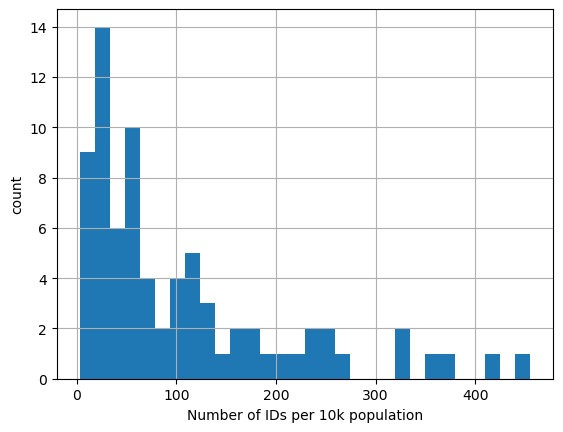

In [18]:
neighbourhood_summary_newind.ids_per_10kcapita.hist(bins=30)
plt.xlabel('Number of IDs per 10k population')
plt.ylabel('count');

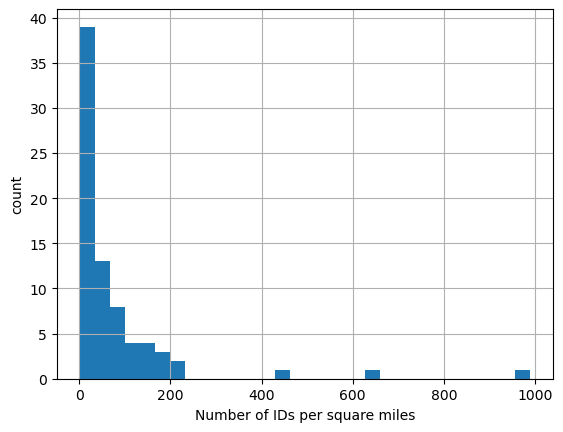

In [19]:
neighbourhood_summary_newind.ids_per_sq_mile.hist(bins=30)
plt.xlabel('Number of IDs per square miles')
plt.ylabel('count');

So they have quite some long tails on them, but there's definitely some structure there.

#### 3.5.2.1 Top regions by IDs density<a id='3.5.2.1_Top_regions_by_IDs_density'></a>

In [20]:
neighbourhood_summary_newind.ids_per_10kcapita.sort_values(ascending=False).head()

neighbourhood_cleansed
Union Station     455.381785
CBD               422.149123
Jefferson Park    376.175549
Highland          353.541345
Five Points       326.463184
Name: ids_per_10kcapita, dtype: float64

In [21]:
neighbourhood_summary_newind.ids_per_sq_mile.sort_values(ascending=False).head()

neighbourhood_cleansed
Union Station     990.000000
Civic Center      637.500000
Five Points       432.291667
Jefferson Park    213.333333
City Park West    201.694915
Name: ids_per_sq_mile, dtype: float64

'Five Points' is 5th and 3th region, respectively.

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

You may be starting to feel there's a bit of a problem here, or at least a challenge. You've constructed some potentially useful and business relevant features, derived from summary statistics, for each of the regions you're concerned with. You've explored many of these features in turn and found various trends. Some regions are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>

You only want numeric data here, although you don't want to lose track of the region labels, so it's convenient to set the region as the index.

In [22]:
#Create a new dataframe, `airbnb_summary_scale` from `airbnb_summary` whilst setting the index to 'neighbourhood_cleansed'
region_summary_scale = neighbourhood_summary_newind
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
region_summary_index = region_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
region_summary_columns = region_summary_scale.columns
region_summary_scale.head()

,Unnamed: 0,neighborhood_cleansed_id_number,neighborhood_cleansed_review_scores_rating,neighborhood_cleansed_review_scores_location,neighborhood_cleansed_bedrooms,neighborhood_cleansed_number_of_reviews,neighborhood_cleansed_price,denver_neighborhoods_population,region_area_sq_miles,ids_per_10kcapita,ids_per_sq_mile
neighbourhood_cleansed,,,,,,,,,,,
Athmar Park,0,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53,61.811643,35.947712
Auraria,1,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32,56.737589,12.500000
Baker,2,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26,241.852839,93.650794
Barnum,3,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47,55.637375,23.129252
Barnum West,4,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74,48.363095,35.135135


The above shows what we expect: the columns we want are all numeric and the region has been moved to the index. Although, it's not necessary to step through the sequence so laboriously, it is often good practice even for experienced professionals. It's easy to make a mistake or forget a step, or the data may have been holding out a surprise! Stepping through like this helps  validate both your work and the data!

Now use `scale()` to scale the data.

In [23]:
region_summary_scale = scale(region_summary_scale)

Note, `scale()` returns an ndarray, so you lose the column names. Because you want to visualise scaled data, you already copied the column names. Now you can construct a dataframe from the ndarray here and reintroduce the column names.

In [24]:
#Create a new dataframe from `airbnb_summary_scale` using the column names we saved in `airbnb_summary_columns`
region_summary_scaled_df = pd.DataFrame(region_summary_scale, columns=region_summary_columns)
region_summary_scaled_df.head()

,Unnamed: 0,neighborhood_cleansed_id_number,neighborhood_cleansed_review_scores_rating,neighborhood_cleansed_review_scores_location,neighborhood_cleansed_bedrooms,neighborhood_cleansed_number_of_reviews,neighborhood_cleansed_price,denver_neighborhoods_population,region_area_sq_miles,ids_per_10kcapita,ids_per_sq_mile
0,-1.709409,-0.148511,-0.084651,-0.842553,0.610768,-0.368682,-0.408313,0.220896,-0.138582,-0.415064,-0.290650
1,-1.663824,-0.876235,1.620854,1.429797,-1.291923,-0.720698,-0.191798,-1.359132,-0.331497,-0.463471,-0.454979
2,-1.618240,0.750441,-0.259494,0.224693,-1.028474,0.400005,-0.615424,-0.554172,-0.181629,1.302566,0.113754
3,-1.572656,-0.448162,-0.745484,-1.283783,-0.123447,-0.540531,-0.624124,-0.316580,-0.148148,-0.473968,-0.380486
4,-1.527072,-0.562315,-0.066134,-0.842631,-0.290815,-0.486273,-0.685524,-0.458325,-0.264534,-0.543366,-0.296344


##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

This is definitely going the extra mile for validating your steps, but provides a worthwhile lesson.

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [25]:
#Call `airbnb_summary_scaled_df`'s `mean()` method
region_summary_scaled_df.mean()

Unnamed: 0                                     -2.921640e-18
neighborhood_cleansed_id_number                -5.551115e-17
neighborhood_cleansed_review_scores_rating     -4.987239e-15
neighborhood_cleansed_review_scores_location   -5.895869e-15
neighborhood_cleansed_bedrooms                 -1.341033e-15
neighborhood_cleansed_number_of_reviews        -1.460820e-17
neighborhood_cleansed_price                     6.591949e-17
denver_neighborhoods_population                 5.843279e-17
region_area_sq_miles                           -5.258951e-17
ids_per_10kcapita                              -8.034509e-17
ids_per_sq_mile                                 3.652049e-18
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [26]:
region_summary_scaled_df.std()

Unnamed: 0                                      1.006645
neighborhood_cleansed_id_number                 1.006645
neighborhood_cleansed_review_scores_rating      1.006645
neighborhood_cleansed_review_scores_location    1.006645
neighborhood_cleansed_bedrooms                  1.006645
neighborhood_cleansed_number_of_reviews         1.006645
neighborhood_cleansed_price                     1.006645
denver_neighborhoods_population                 1.006645
region_area_sq_miles                            1.006645
ids_per_10kcapita                               1.006645
ids_per_sq_mile                                 1.006645
dtype: float64

Well, this is a little embarrassing. The numbers should be closer to 1 than this! Check the documentation for [scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) to see if you used it right. What about [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), did you mess up there? Is one of them not working right?

The keen observer, who already has some familiarity with statistical inference and biased estimators, may have noticed what's happened here. `scale()` uses the biased estimator for standard deviation (ddof=0). This doesn't mean it's bad! It simply means it calculates the standard deviation of the sample it was given. The `std()` method, on the other hand, defaults to using ddof=1, that is it's normalized by N-1. In other words, the `std()` method default is to assume you want your best estimate of the population parameter based on the given sample. You can tell it to return the biased estimate instead:

In [27]:
#Repeat the previous call to `std()` but pass in ddof=0 
region_summary_scaled_df.std(ddof=0)

Unnamed: 0                                      1.0
neighborhood_cleansed_id_number                 1.0
neighborhood_cleansed_review_scores_rating      1.0
neighborhood_cleansed_review_scores_location    1.0
neighborhood_cleansed_bedrooms                  1.0
neighborhood_cleansed_number_of_reviews         1.0
neighborhood_cleansed_price                     1.0
denver_neighborhoods_population                 1.0
region_area_sq_miles                            1.0
ids_per_10kcapita                               1.0
ids_per_sq_mile                                 1.0
dtype: float64

There! Now it agrees with `scale()` and our expectation. This just goes to show different routines to do ostensibly the same thing can have different behaviours. Good practice is to keep validating your work and checking the documentation!

#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [28]:
region_pca = PCA().fit(region_summary_scale)

Plot the cumulative variance ratio with number of components.

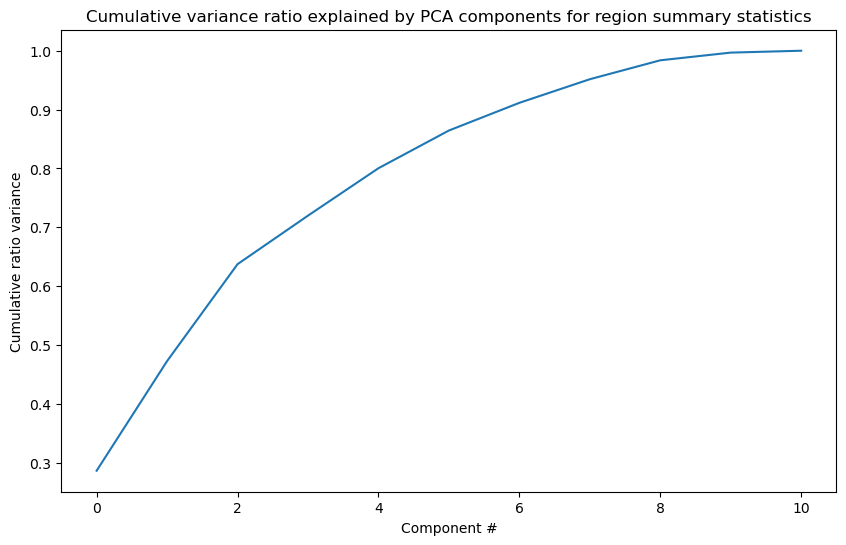

In [29]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `airbnb_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for airbnb summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(region_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for region summary statistics');

The first two components seem to account for over 60% of the variance, and the first four for over 75%.

**Note:** It is important to move quickly when performing exploratory data analysis. You should not spend hours trying to create publication-ready figures. However, it is crucially important that you can easily review and summarise the findings from EDA. Descriptive axis labels and titles are _extremely_ useful here. When you come to reread your notebook to summarise your findings, you will be thankful that you created descriptive plots and even made key observations in adjacent markdown cells.

Apply the transformation to the data to obtain the derived features.

In [30]:
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
region_pca_x = region_pca.transform(region_summary_scale)

In [31]:
region_pca_x.shape

(76, 11)

Plot the first two derived features (the first two principle components) and label each point with the name of the region.

Take a moment to familiarize yourself with the code below. It will extract the first and second columns from the transformed data (`state_pca_x`) as x and y coordinates for plotting. Recall the region labels you saved (for this purpose) for subsequent calls to `plt.annotate`. Grab the second (index 1) value of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained
by the two PCA components you're visualizing. Then create an appropriately sized and well-labelled scatterplot
to convey all of this information.

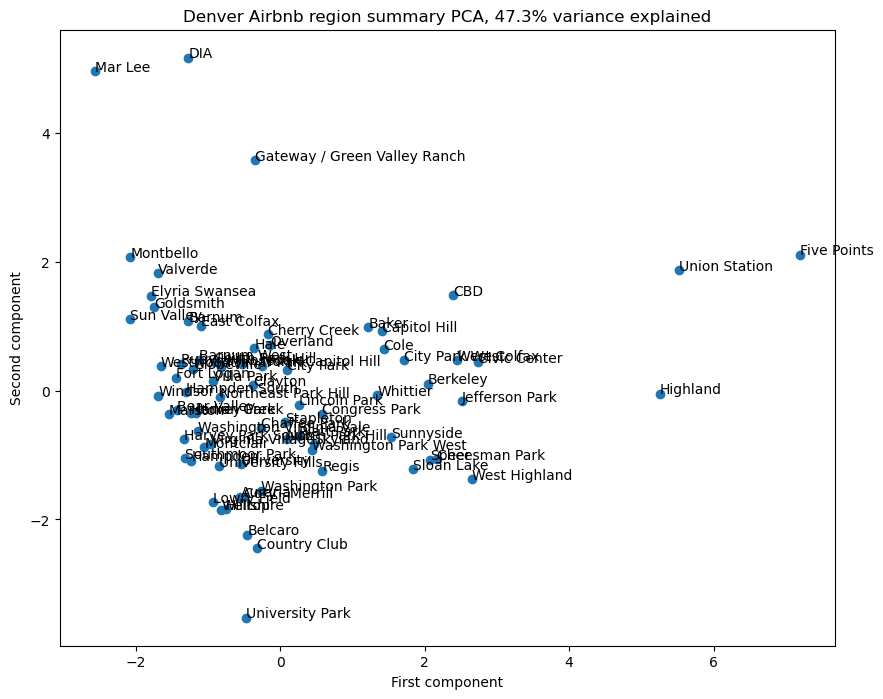

In [32]:
x = region_pca_x[:, 0]
y = region_pca_x[:, 1]
region = region_summary_index
pc_var = 100 * region_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Denver Airbnb region summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(region, x, y):
    plt.annotate(s, (x, y))

#### 3.5.3.3 Average price by region<a id='3.5.3.3_Average_price_by_region'></a>

Here, all point markers for the regions are the same size and colour. You've visualized relationships between the regions based on features such as the total skiable terrain area, but your ultimate interest lies in prices. You know ticket prices in each region, so it might be interesting to see if there's any pattern there.

In [33]:
#Calculate the average 'Price' price by region
region_avg_price = airbnb_data.groupby('neighbourhood_cleansed')['price'].mean()
region_avg_price.head()

neighbourhood_cleansed
Athmar Park    142.472727
Auraria        163.750000
Baker          122.119658
Barnum         121.264706
Barnum West    115.230769
Name: price, dtype: float64

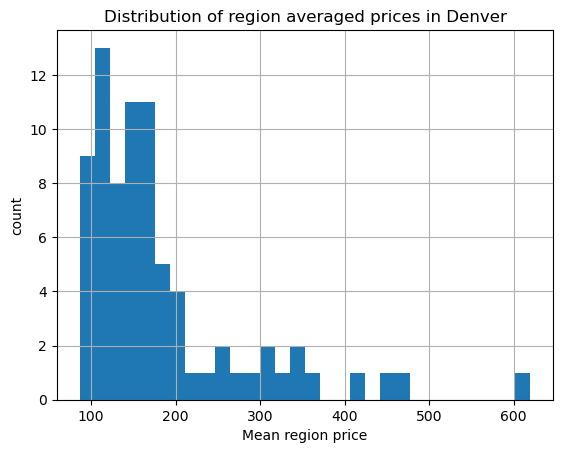

In [34]:
region_avg_price.hist(bins=30)
plt.title('Distribution of region averaged prices in Denver')
plt.xlabel('Mean region price')
plt.ylabel('count');

#### 3.5.3.4 Adding average price to scatter plot<a id='3.5.3.4_Adding_average_price_to_scatter_plot'></a>

At this point you have several objects floating around. You have just calculated average price by region from our airbnb data, but you've been looking at principle components generated from other region airbnb summary data. We extracted indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard to keep track of them all. You'll create a new DataFrame to do this.

In [35]:
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by region_pca_x[:, 0],
#and the second by region_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `airbnb_summary_index`
pca_df = pd.DataFrame({'PC1': region_pca_x[:, 0], 'PC2': region_pca_x[:, 1]}, index=region_summary_index)
pca_df.head()

,PC1,PC2
neighbourhood_cleansed,,
Athmar Park,-0.817239,0.375044
Auraria,-0.552681,-1.646735
Baker,1.216272,0.990750
Barnum,-1.277031,1.077287
Barnum West,-1.132617,0.481947


That worked, and you have region as an index.

In [36]:
# our average region prices also have region as an index
region_avg_price.head()

neighbourhood_cleansed
Athmar Park    142.472727
Auraria        163.750000
Baker          122.119658
Barnum         121.264706
Barnum West    115.230769
Name: price, dtype: float64

In [37]:
# we can also cast it to a dataframe using Series' to_frame() method:
region_avg_price.to_frame().head()

,price
neighbourhood_cleansed,
Athmar Park,142.472727
Auraria,163.750000
Baker,122.119658
Barnum,121.264706
Barnum West,115.230769


Now you can concatenate both parts on axis 1 and using the indexes.

In [38]:
#Code task 10#
#Use pd.concat to concatenate `pca_df` and `region_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, region_avg_price], axis=1)
pca_df.head()

,PC1,PC2,price
neighbourhood_cleansed,,,
Athmar Park,-0.817239,0.375044,142.472727
Auraria,-0.552681,-1.646735,163.750000
Baker,1.216272,0.990750,122.119658
Barnum,-1.277031,1.077287,121.264706
Barnum West,-1.132617,0.481947,115.230769


You saw some range in average ticket price histogram above, but it may be hard to pick out differences if you're thinking of using the value for point size. You'll add another column where you seperate these prices into quartiles; that might show something.

In [39]:
pca_df['Quartile'] = pd.qcut(pca_df.price, q=4, precision=1)
pca_df.head()

,PC1,PC2,price,Quartile
neighbourhood_cleansed,,,,
Athmar Park,-0.817239,0.375044,142.472727,"(119.0, 156.3]"
Auraria,-0.552681,-1.646735,163.750000,"(156.3, 194.7]"
Baker,1.216272,0.990750,122.119658,"(119.0, 156.3]"
Barnum,-1.277031,1.077287,121.264706,"(119.0, 156.3]"
Barnum West,-1.132617,0.481947,115.230769,"(86.4, 119.0]"


In [40]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1          float64
PC2          float64
price        float64
Quartile    category
dtype: object

This looks great. But, let's have a healthy paranoia about it. You've just created a whole new DataFrame by combining information. Do we have any missing values? It's a narrow DataFrame, only four columns, so you'll just print out any rows that have any null values, expecting an empty DataFrame.

In [41]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,price,Quartile
neighbourhood_cleansed,,,,
Gateway / Green Valley Ranch,-0.345405,3.585049,NaN,NaN
College View - South Platte,NaN,NaN,228.266667,"(194.7, 619.8]"
Gateway - Green Valley Ranch,NaN,NaN,113.431250,"(86.4, 119.0]"


Ah, Gateway / Green Valley Ranch. How has this happened? Recall you created the original airbnb state summary dataset in the previous step before removing them with missing prices. This made sense because you wanted to capture all the other available information. Gateway / Green Valley Ranch is special, because we combine them together in Data Wrangling part. 
You have two choices here. If you're interested in looking for any pattern with price, drop this row. But you are also generally interested in any clusters or trends, then you'd like to see Gateway / Green Valley Ranch even if the price is unknown. So, replace these missing values to make it easier to handle/display them.

Because `Quartile` is a category type, there's an extra step here. Add the category (the string 'NA') that you're going to use as a replacement.

In [42]:
pca_df['price'].fillna(pca_df.price.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Gateway / Green Valley Ranch']

PC1          -0.345405
PC2           3.585049
price       182.445711
Quartile            NA
Name: Gateway / Green Valley Ranch, dtype: object

Note, in the above Quartile has the string value 'NA' that you inserted. This is different to `numpy`'s NaN type.

You now have enough information to recreate the scatterplot, now adding marker size for ticket price and colour for the discrete quartile.

Notice in the code below how you're iterating over each quartile and plotting the points in the same quartile group as one. This gives a list of quartiles for an informative legend with points coloured by quartile and sized by price (higher prices are represented by larger point markers).

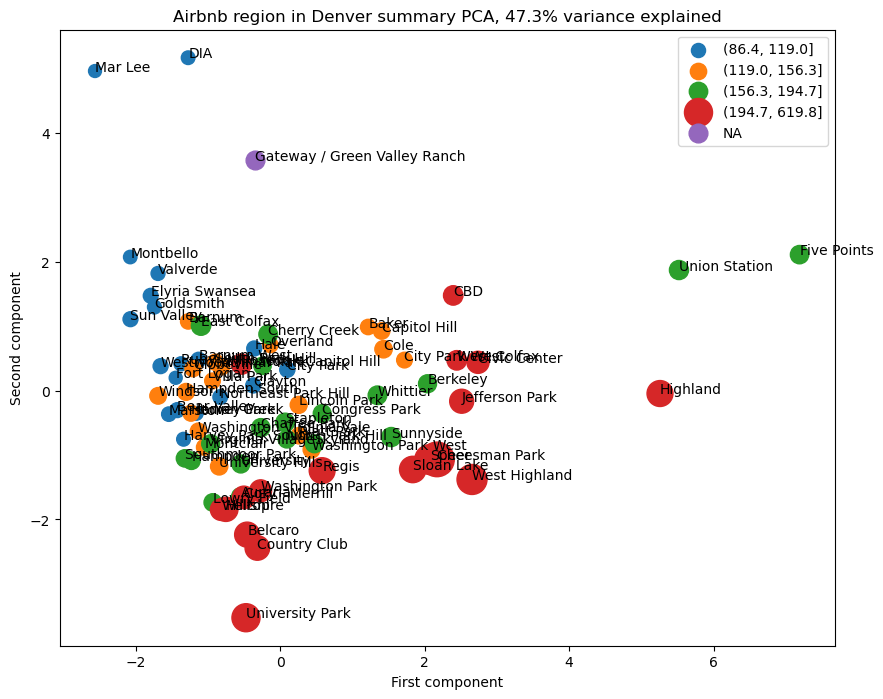

In [43]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.price
quartiles = pca_df.Quartile
region = pca_df.index
pc_var = 100 * region_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Airbnb region in Denver summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(region, x, y):
    plt.annotate(s, (x, y))

Now, you see the same distribution of states as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the down, the right, and up top. There's also a spread of the other quartiles as well. In this representation of the airbn summaries for each region, which accounts for some 47.3% of the variance, you simply do not see a pattern with price.

The above scatterplot was created using matplotlib. This is powerful, but took quite a bit of effort to set up. You have to iterate over the categories, plotting each separately, to get a colour legend. You can also tell that the points in the legend have different sizes as well as colours. As it happens, the size and the colour will be a 1:1 mapping here, so it happily works for us here. If we were using size and colour to display fundamentally different aesthetics, you'd have a lot more work to do. So matplotlib is powerful, but not ideally suited to when we want to visually explore multiple features as here (and intelligent use of colour, point size, and even shape can be incredibly useful for EDA).

Fortunately, there's another option: seaborn. You saw seaborn in action in the previous notebook, when you wanted to distinguish prices in the boxplot. After melting the dataframe to have ticket price as a single column with the ticket type represented in a new column, you asked seaborn to create separate boxes for each type.

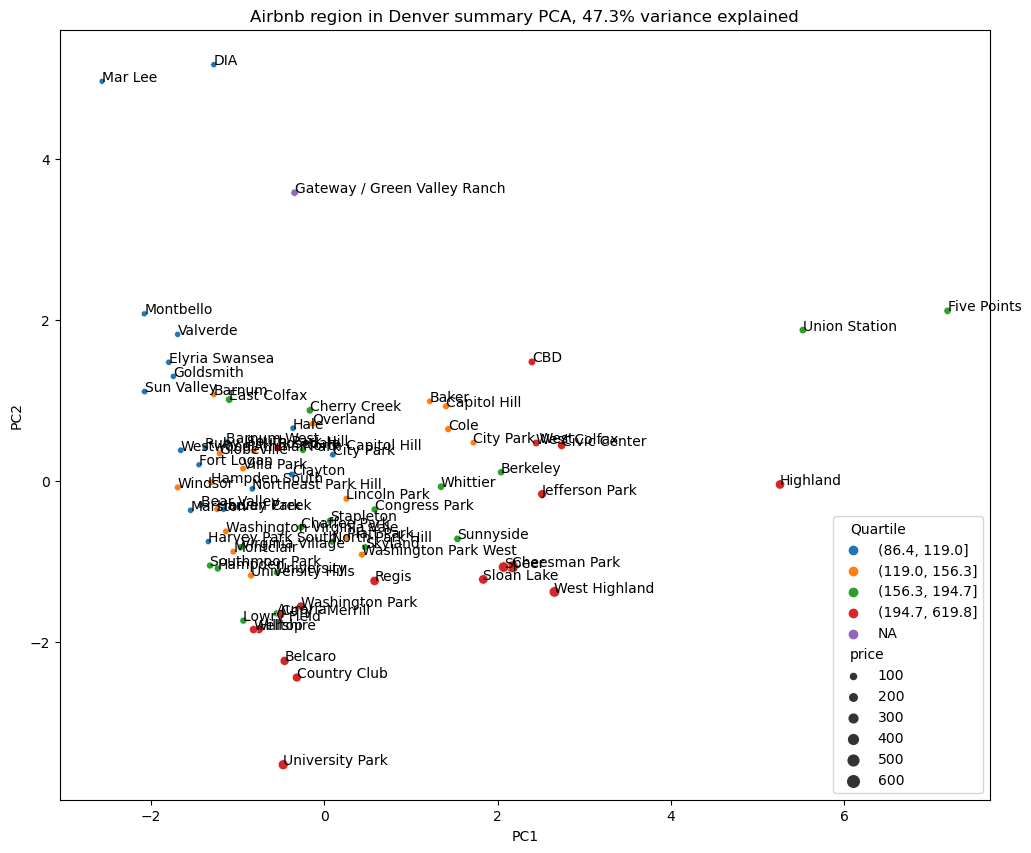

In [44]:
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'price' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x='PC1', y='PC2', size='price', hue='Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(region, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Airbnb region in Denver summary PCA, {pc_var:.1f}% variance explained');

Seaborn does more! You should always care about your output. What if you want the ordering of the colours in the legend to align intuitively with the ordering of the quartiles? Add a `hue_order` argument! Seaborn has thrown in a few nice other things:

* the aesthetics are separated in the legend
* it defaults to marker sizes that provide more contrast (smaller to larger)
* when starting with a DataFrame, you have less work to do to visualize patterns in the data

The last point is important. Less work means less chance of mixing up objects and jumping to erroneous conclusions. This also emphasizes the importance of getting data into a suitable DataFrame. In the previous notebook, you `melt`ed the data to make it longer, but with fewer columns, in order to get a single column of price with a new column representing a categorical feature you'd want to use. A **key skill** is being able to wrangle data into a form most suited to the particular use case.

Having gained a good visualization of the region summary data, you can discuss and follow up on your findings.

In the first two components, there is a spread of regions across the first component. It looks like 'Mar Lee', 'DIA', and 'Gateway / Green Valley Ranch' might be off on their own a little in the second dimension, although they're really no more extreme than 'Highland', 'Union Station', and 'Five Points' in the first dimension. But if you were curious, could you get an idea what it is that pushes 'Mar Lee', 'DIA', and 'Gateway / Green Valley Ranch' up?

The `components_` attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). **NB we were sensible and scaled our original features (to zero mean and unit variance)**. You may not always be interested in interpreting the coefficients of the PCA transformation in this way, although it's more likely you will when using PCA for EDA as opposed to a preprocessing step as part of a machine learning pipeline. The attribute is actually a numpy ndarray, and so has been stripped of helpful index and column names. Fortunately, you thought ahead and saved these. This is how we were able to annotate the scatter plots above. It also means you can construct a DataFrame of `components_` with the feature names for context:

In [45]:
pd.DataFrame(region_pca.components_, columns=region_summary_columns)

,Unnamed: 0,neighborhood_cleansed_id_number,neighborhood_cleansed_review_scores_rating,neighborhood_cleansed_review_scores_location,neighborhood_cleansed_bedrooms,neighborhood_cleansed_number_of_reviews,neighborhood_cleansed_price,denver_neighborhoods_population,region_area_sq_miles,ids_per_10kcapita,ids_per_sq_mile
0,-0.031271,0.499177,0.117985,0.196679,-0.035278,0.464038,0.258329,-0.062519,-0.078305,0.474109,0.423215
1,-0.087441,0.168870,-0.529317,-0.515771,-0.325285,0.100903,-0.332052,0.150210,0.343224,0.195369,0.113379
2,0.464927,0.206068,-0.127303,-0.113746,0.507662,0.244860,0.124211,0.570283,0.074292,-0.188876,-0.112752
3,0.157577,-0.125225,-0.051746,0.078038,0.192409,-0.166198,0.389339,-0.303441,0.774172,0.204902,-0.033007
4,0.658688,-0.159514,-0.207949,-0.189052,-0.025363,-0.271357,0.044166,-0.269132,-0.344460,0.107037,0.427705
5,-0.419573,-0.061597,-0.494196,-0.201718,0.146166,-0.043988,0.643541,-0.030542,-0.299813,-0.076550,-0.033463
6,-0.012232,-0.153275,-0.132323,0.459892,-0.375851,-0.298284,0.180837,0.589189,0.118671,-0.045222,0.348046
7,0.329496,0.081781,0.164932,-0.168938,-0.655340,0.197887,0.413617,-0.012553,-0.013943,-0.139673,-0.411621
8,-0.177387,-0.100278,0.569148,-0.578216,0.036337,-0.093382,0.185511,0.177572,0.122850,-0.155167,0.430186
9,-0.002487,0.004921,0.175405,-0.159341,0.064168,-0.394828,0.039477,0.302246,-0.180247,0.723979,-0.366415


For the row associated with the second component, are there any large values?

It looks like `ids_per_10kcapita` and `ids_per_sq_mile` might count for quite a lot, in a positive sense. Be aware that sign matters; a large negative coefficient multiplying a large negative feature will actually produce a large positive PCA score.

In [46]:
neighbourhood_summary[neighbourhood_summary.neighbourhood_cleansed.isin(['Mar Lee', 'DIA', 'Gateway / Green Valley Ranch'])].T

,21,39,75
Unnamed: 0,21,39,75
neighbourhood_cleansed,DIA,Mar Lee,Gateway / Green Valley Ranch
neighborhood_cleansed_id_number,31,36,177
neighborhood_cleansed_review_scores_rating,4.652143,4.324444,4.678891
neighborhood_cleansed_review_scores_location,4.639286,4.403704,4.493253
neighborhood_cleansed_bedrooms,1.806452,1.861111,2.629167
neighborhood_cleansed_number_of_reviews,461,527,10446
neighborhood_cleansed_price,96.064516,86.527778,170.848959
denver_neighborhoods_population,1165,12452,29201
region_area_sq_miles,53.0,1.59,19.66


In [47]:
region_summary_scaled_df[neighbourhood_summary.neighbourhood_cleansed.isin(['Mar Lee', 'DIA', 'Gateway / Green Valley Ranch'])].T

,21,39,75
Unnamed: 0,-0.752140,0.068376,1.709409
neighborhood_cleansed_id_number,-0.490969,-0.419624,1.592318
neighborhood_cleansed_review_scores_rating,-1.964164,-5.374101,-1.685830
neighborhood_cleansed_review_scores_location,-1.434985,-3.323422,-2.605591
neighborhood_cleansed_bedrooms,-1.137253,-0.987493,1.116883
neighborhood_cleansed_number_of_reviews,-0.650559,-0.638082,1.237129
neighborhood_cleansed_price,-0.880558,-0.977603,-0.119560
denver_neighborhoods_population,-1.270421,0.906288,4.136348
region_area_sq_miles,8.067483,-0.129016,2.751956
ids_per_10kcapita,1.533835,-0.728943,-0.426486


### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

You can offer some justification for treating all regions equally, and work towards building a pricing model that considers all region together, without treating any one particularly specially. You haven't seen any clear grouping yet, but you have captured potentially relevant region data in features most likely to be relevant to your business use case. This answers a big question!

### 3.5.5 Airbnb Region Numeric Data<a id='3.5.5_Airbnb_Region_Numeric_Data'></a>

In [48]:
# shift column 'Name' to first position 
first_column = airbnb_data.pop('neighbourhood_cleansed') 
  
# insert column using insert(position,column_name, 
# first_column) function 
airbnb_data.insert(0, 'neighbourhood_cleansed', first_column)

In [49]:
airbnb_data.head()

,neighbourhood_cleansed,Unnamed: 0,id,description,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,...,last_scraped,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,home_type
0,North Park Hill,0,6.070000e+17,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,430149575,Roye,11/2/2021,NaN,100%,75%,...,12/29/2023,3.00,2.50,2.50,3.00,3.50,4.00,3.00,0.11,Home
1,Hale,1,5.460000e+17,Rental unit in Denver · 2 bedrooms · 3 beds · ...,169214047,Jerrod,1/22/2018,"Chicago, IL",NaN,0%,...,12/29/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rental
2,Five Points,3,5.242953e+07,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,107279139,Kyle And Kimberly,12/14/2016,"Denver, CO",100%,100%,...,12/29/2023,4.78,4.88,4.62,4.78,4.78,4.93,4.59,2.52,Townhouse
3,West Colfax,4,6.320000e+17,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,416194740,Clayton,7/31/2021,"Colorado, United States",100%,100%,...,12/29/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Townhouse
4,Sunnyside,5,6.880000e+17,Home in Denver · ★5.0 · 2 bedrooms · 2 beds · ...,133612752,Ryan,6/5/2017,"Denver, CO",NaN,91%,...,12/29/2023,5.00,5.00,5.00,5.00,5.00,4.92,4.92,0.99,Home


In [50]:
airbnb_data.shape

(4889, 34)

After what may feel a detour, return to examining the airbnb region data. It's worth noting, the previous EDA was valuable because it's given us some potentially useful features, as well as validating an approach for how to subsequently handle the state labels in your modeling.

In [51]:
airbnb_data.head().T

,0,1,2,3,4
neighbourhood_cleansed,North Park Hill,Hale,Five Points,West Colfax,Sunnyside
Unnamed: 0,0,1,3,4,5
id,607000000000000000.0,546000000000000000.0,52429527.0,632000000000000000.0,688000000000000000.0
description,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,Rental unit in Denver · 2 bedrooms · 3 beds · ...,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,Home in Denver · ★5.0 · 2 bedrooms · 2 beds · ...
host_id,430149575,169214047,107279139,416194740,133612752
host_name,Roye,Jerrod,Kyle And Kimberly,Clayton,Ryan
host_since,11/2/2021,1/22/2018,12/14/2016,7/31/2021,6/5/2017
host_location,NaN,"Chicago, IL","Denver, CO","Colorado, United States","Denver, CO"
host_response_rate,100%,NaN,100%,100%,NaN
host_acceptance_rate,75%,0%,100%,100%,91%


#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

Having previously spent some time exploring the region summary data you derived, you now start to explore the reion-level data in more detail. This can help guide you on how (or whether) to use the region labels in the data. It's now time to merge the two datasets and engineer some intuitive features. For example, you can engineer a ID's share of the supply for a given region.

In [52]:
neighbourhood_summary.head()

,Unnamed: 0,neighbourhood_cleansed,neighborhood_cleansed_id_number,neighborhood_cleansed_review_scores_rating,neighborhood_cleansed_review_scores_location,neighborhood_cleansed_bedrooms,neighborhood_cleansed_number_of_reviews,neighborhood_cleansed_price,denver_neighborhoods_population,region_area_sq_miles
0,0,Athmar Park,55,4.832766,4.713191,2.444444,1952,142.472727,8898,1.53
1,1,Auraria,4,4.996667,4.996667,1.750000,90,163.750000,705,0.32
2,2,Baker,118,4.815963,4.846330,1.846154,6018,122.119658,4879,1.26
3,3,Barnum,34,4.769259,4.658148,2.176471,1043,121.264706,6111,1.47
4,4,Barnum West,26,4.834545,4.713182,2.115385,1330,115.230769,5376,0.74


In [53]:
# DataFrame's merge method provides SQL-like joins
# here 'region' is a column (not an index)
airbnb_data = airbnb_data.merge(neighbourhood_summary, how='left', on='neighbourhood_cleansed')
airbnb_data.head().T

,0,1,2,3,4
neighbourhood_cleansed,North Park Hill,Hale,Five Points,West Colfax,Sunnyside
Unnamed: 0_x,0,1,3,4,5
id,607000000000000000.0,546000000000000000.0,52429527.0,632000000000000000.0,688000000000000000.0
description,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,Rental unit in Denver · 2 bedrooms · 3 beds · ...,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,Home in Denver · ★5.0 · 2 bedrooms · 2 beds · ...
host_id,430149575,169214047,107279139,416194740,133612752
host_name,Roye,Jerrod,Kyle And Kimberly,Clayton,Ryan
host_since,11/2/2021,1/22/2018,12/14/2016,7/31/2021,6/5/2017
host_location,NaN,"Chicago, IL","Denver, CO","Colorado, United States","Denver, CO"
host_response_rate,100%,NaN,100%,100%,NaN
host_acceptance_rate,75%,0%,100%,100%,91%


Having merged your neighbourhood_summary features into the airbnb_data, add "state resort competition" features:

* ratio of id review_scores_rating to total region review_scores_rating
* ratio of id review_scores_location to total region review_scores_location
* ratio of id bedrooms count to total region bedrooms mean
* ratio of id number_of_reviews to total region number_of_reviews

Once you've derived these features to put each ID within the context of its region,drop those region columns. Their main purpose was to understand what share of regions "assets" is accounted for by each ID.

In [54]:
airbnb_data['id_review_scores_rating_ac_region_ratio'] = airbnb_data.review_scores_rating / airbnb_data.neighborhood_cleansed_review_scores_rating
airbnb_data['id_review_scores_location_ac_region_ratio'] = airbnb_data.review_scores_location / airbnb_data.neighborhood_cleansed_review_scores_location
airbnb_data['id_bedrooms_count_ac_mean_region_ratio'] = airbnb_data.bedrooms / airbnb_data.neighborhood_cleansed_bedrooms
airbnb_data['id_number_of_reviews_ac_region_ratio'] = airbnb_data.number_of_reviews / airbnb_data.neighborhood_cleansed_number_of_reviews

airbnb_data.drop(columns=['neighborhood_cleansed_review_scores_rating', 'neighborhood_cleansed_review_scores_location', 
                       'neighborhood_cleansed_bedrooms', 'neighborhood_cleansed_number_of_reviews'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

C:\Users\sepeh\AppData\Local\Temp\ipykernel_28280\3537984376.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airbnb_data.corr());


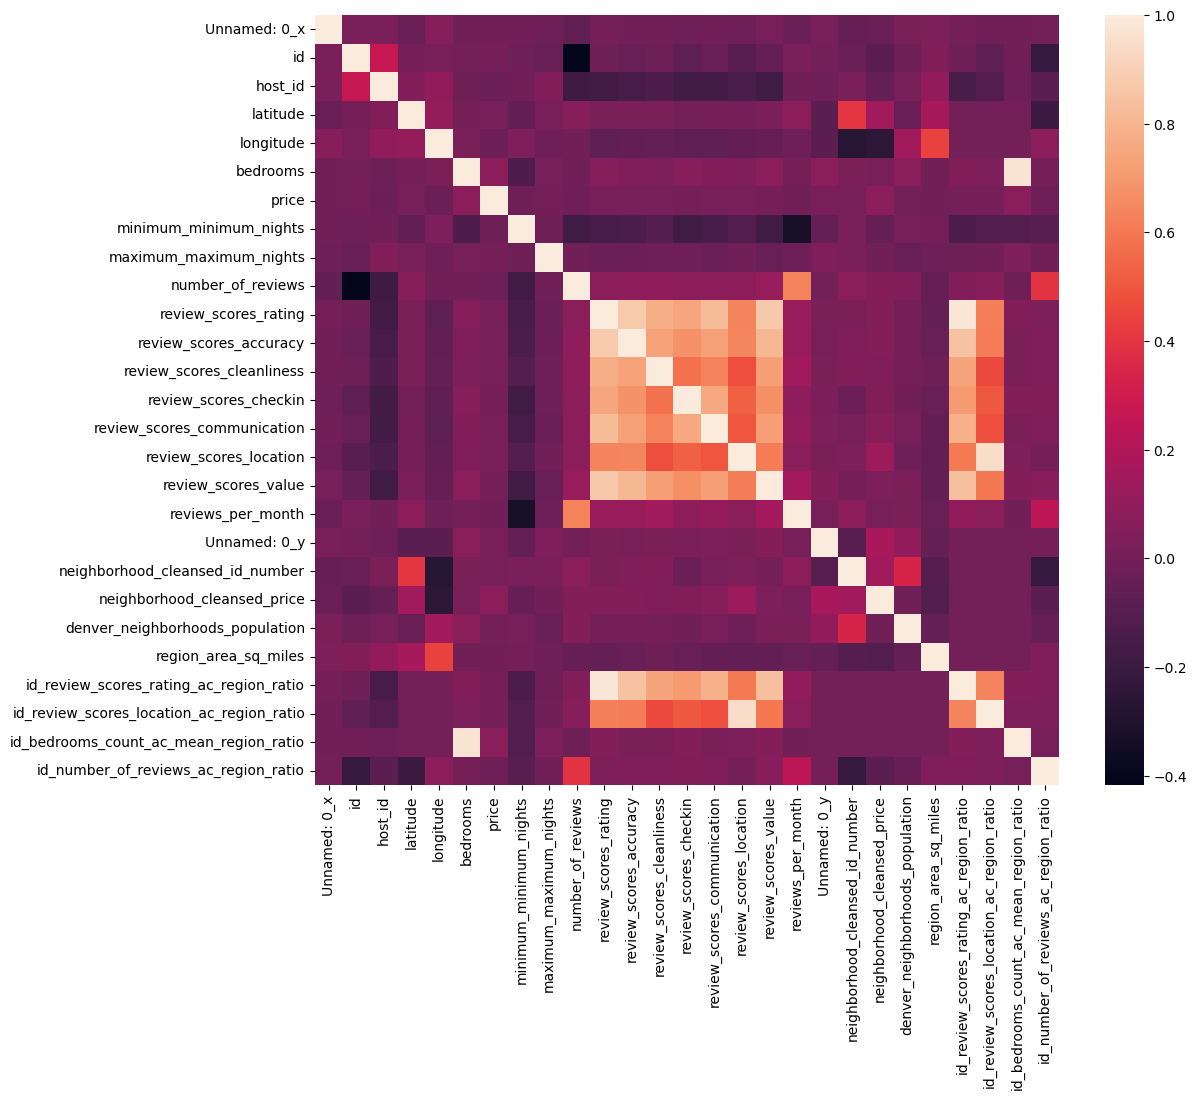

In [55]:
#Show a seaborn heatmap of correlations in airbnb_data
#Hint: call pandas' `corr()` method on `airbnb_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(airbnb_data.corr());

There is a lot to take away from this. First, review scores and ratios that are given are quite highly correlated. This isn't a surprise. You can also see that you've introduced a lot of multicollinearity with your new ratio features. Region area sq miles is related with logtitude.

let's focus on the price item. It's related to latitude, logtitude, and review score for location.

## 3.6 Summary<a id='3.6_Summary'></a>

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

**A: 1**

Summary of the exploratory data analysis:

 neighbourhood_cleansed, neighborhood_cleansed_id_number, neighborhood_cleansed_review_scores_rating, neighborhood_cleansed_review_scores_location, neighborhood_cleansed_bedrooms, neighborhood_cleansed_number_of_reviews, neighborhood_cleansed_price, denver_neighborhoods_population, and region_area_sq_miles 


At first, I gave top states information by order of each of the summary statistics. 
Statistics information were neighbourhood_cleansed, neighborhood_cleansed_id_number, neighborhood_cleansed_review_scores_rating, neighborhood_cleansed_review_scores_location, neighborhood_cleansed_bedrooms, neighborhood_cleansed_number_of_reviews, neighborhood_cleansed_price, denver_neighborhoods_population, and region_area_sq_miles.

In this step I understood that I need to work on id density, because the result didn't give fair data for comparing.
I made ids_per_10kcapita, and ids_per_sq_mile to give a good view of the data.
Then I visualized high dimensional data. The technique was PCA (Principle components analysis).

It has these steps:

-Scale the data
-Verifying the scaling
-Calculate the PCA transformation
-Average ticket price by state
-Adding average ticket price to scatter plot

Quartile was a category type, there's an extra step there. Add the category (the string 'NA') that I'm going to use as a replacement.

Next, I worked on conclusion on how to handle state label.
Finally, I gave ski Airbnb numeric data that it had these steps:

-Feature engineering
-Feature correlation heatmap
-Scatterplots of numeric features against ticket price

Summary statistics data was categorical, because we knew top 5 states information. After when we use id density, the data became numerical.

Patterns showed relationships between region and price.

In [56]:
airbnb_data.head().T

,0,1,2,3,4
neighbourhood_cleansed,North Park Hill,Hale,Five Points,West Colfax,Sunnyside
Unnamed: 0_x,0,1,3,4,5
id,607000000000000000.0,546000000000000000.0,52429527.0,632000000000000000.0,688000000000000000.0
description,Home in Denver · 1 bedroom · 1 bed · 1 shared ...,Rental unit in Denver · 2 bedrooms · 3 beds · ...,Townhouse in Denver · ★4.78 · 3 bedrooms · 4 b...,Townhouse in Denver · ★New · 2 bedrooms · 2 be...,Home in Denver · ★5.0 · 2 bedrooms · 2 beds · ...
host_id,430149575,169214047,107279139,416194740,133612752
host_name,Roye,Jerrod,Kyle And Kimberly,Clayton,Ryan
host_since,11/2/2021,1/22/2018,12/14/2016,7/31/2021,6/5/2017
host_location,NaN,"Chicago, IL","Denver, CO","Colorado, United States","Denver, CO"
host_response_rate,100%,NaN,100%,100%,NaN
host_acceptance_rate,75%,0%,100%,100%,91%


In [57]:
# Save the data 

airbnb_data.to_csv('airbnb_data_cleaned_v2.csv')
neighbourhood_summary.to_csv('neighbourhood_summary_v2.csv')